## Задание 4: Полиномиальная регрессия

In [4]:
from math import sin
import scipy.stats as st
import numpy as np
from matplotlib import pyplot as plt

def get_y_mass(x_mass, noise_func):
  y_mass = []
  epsilon = 0.01
  for el in x_mass:
    y_mass.append(4 * sin(2 * el + 4) + epsilon * noise_func())
  return np.array(y_mass)

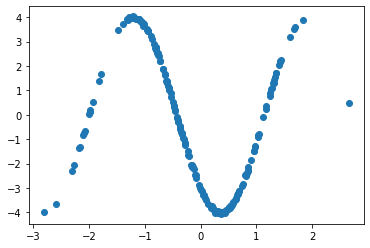

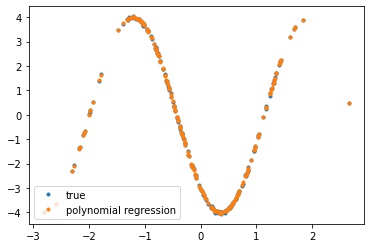

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

n = 200
p = n // 10

# Зададим фактор:
x_mass = st.norm.rvs(size=n)
# Зададим отклик: 
y_mass = get_y_mass(x_mass, lambda: st.norm.rvs(loc=0, scale=3))
plt.scatter(x_mass, y_mass)
plt.show()

x_poly = np.array([np.array([xi**i for i in range(1, p + 1)]) for xi in x_mass])
model = LinearRegression()
model.fit(x_poly, y_mass)

plt.plot(x_mass, y_mass, '.')
plt.plot(x_mass, x_poly @ model.coef_ + model.intercept_, '.')
plt.legend(['true', 'polynomial regression'])
plt.show()